In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('zomato.csv')

In [3]:
df.shape

(51717, 17)

In [399]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [400]:
df[df.duplicated(subset=["url",'name'])]
#no duplicates

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [401]:
# removing unwanted coumns
df.drop(['url','address','phone','name','reviews_list',"menu_item"],axis=1,inplace=True)

In [402]:
#Step 2: Read the data, and convert the data types.
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   votes                        51717 non-null  int64 
 4   location                     51696 non-null  object
 5   rest_type                    51490 non-null  object
 6   dish_liked                   23639 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


Data cleaning

In [ ]:
# Step 3: Perform the described method for the data, Try to find any essential points from the
# described analysis. And check the missing values and Duplicate records. Impute the
# missing values in the best way possible.


In [404]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [405]:
df['rate']=df['rate'].map(lambda x:  x.split('/')[0] if type(x)==str else x)

In [406]:
print(len(df[df['rate']=='NEW']))
display(df[df['rate']=='NEW'].head())
# there are 2208 new restaurants which doesnt have any rating and votes since we are building model to assist new restaurants
#it s better to drop these retaurants which will not give any info to establish new restaurants
df.drop(index=df[df['rate']=='NEW'].index,axis=0,inplace=True)

2208


,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
72,No,No,NEW,0,Banashankari,Quick Bites,NaN,North Indian,150,Delivery,Banashankari
75,No,No,NEW,0,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500,Delivery,Banashankari
110,No,No,NEW,0,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,Delivery,Banashankari
130,No,No,NEW,0,Banashankari,"Takeaway, Delivery",NaN,"Biryani, Rolls, Chinese",200,Delivery,Banashankari
131,No,No,NEW,0,Banashankari,Quick Bites,NaN,North Indian,100,Delivery,Banashankari


In [407]:
df[df['rate']=='-']
df.drop(index=df[df['rate']=='-'].index,inplace=True)

In [408]:
df['rate']=df['rate'].astype(float)

In [409]:
df.reset_index(drop=True,inplace=True)

In [410]:
#approx_cost for two
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [411]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [412]:
df.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,49440.000000,49099.000000
mean,3.700449,296.763451,561.224567
std,0.440513,819.779986,443.454428
min,1.800000,0.000000,40.000000
25%,3.400000,9.000000,300.000000
50%,3.700000,47.000000,400.000000
75%,4.000000,212.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [186]:
#mean rating is 3.7
#avg approx value of cost of two people is 561
#min and max cost of two people are 40 and 6000 which means there are wide variety of restaurants
#min value of votes is zero which means there are restaurants which are not voted yet

In [413]:
df.describe(include=object)

,online_order,book_table,location,rest_type,dish_liked,cuisines,listed_in(type),listed_in(city)
count,49440,49440,49419,49215,23492,49395,49440,49440
unique,2,2,93,93,5228,2632,7,30
top,Yes,No,BTM,Quick Bites,Biryani,North Indian,Delivery,BTM
freq,29342,43120,4793,18003,180,2777,24728,3108


In [414]:
#most of the restaurants delivers online 
#most of the retaurants has no table booking option
#majority of restaurants are of quick bites
#biriyani is the most liked dish
#North indian is the most offered cuisine

In [415]:
#step 3 missing values
df.isnull().mean()*100

online_order                    0.000000
book_table                      0.000000
rate                           15.726133
votes                           0.000000
location                        0.042476
rest_type                       0.455097
dish_liked                     52.483819
cuisines                        0.091019
approx_cost(for two people)     0.689725
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [416]:
df['rate'].fillna(df['rate'].median(),inplace=True)

In [417]:
df['rate'].isnull().sum()

0

In [418]:
print(df['location'].nunique())
df['listed_in(city)'].nunique()
#loaction and listed_in city are saying location or neibhourhood of resturant so we can keep listed city and drop location

93


30

In [419]:
df.drop(['location'],axis=1,inplace=True)

In [420]:
df.rename(columns={'approx_cost(for two people)':'cost_of_two','listed_in(city)':'area'},inplace=True)

In [421]:
#dish liked has 52% null value so we can drop disliked
df.drop(['dish_liked'],axis=1,inplace=True)

In [422]:
df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost_of_two,listed_in(type),area
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [423]:
df.isnull().mean()*100

online_order       0.000000
book_table         0.000000
rate               0.000000
votes              0.000000
rest_type          0.455097
cuisines           0.091019
cost_of_two        0.689725
listed_in(type)    0.000000
area               0.000000
dtype: float64

In [424]:
#cost of two has .6% null value since it is our target variable we can drop the null values
df.dropna(subset=['cost_of_two'],inplace=True)

In [425]:
df.reset_index(drop=True,inplace=True)

In [426]:
df.isnull().sum()
#we can drop these null values since there are only few null values

online_order         0
book_table           0
rate                 0
votes                0
rest_type          202
cuisines            19
cost_of_two          0
listed_in(type)      0
area                 0
dtype: int64

In [427]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [428]:
df.isnull().sum()

online_order       0
book_table         0
rate               0
votes              0
rest_type          0
cuisines           0
cost_of_two        0
listed_in(type)    0
area               0
dtype: int64

Step 4: Once the basic preprocessing is done like converting the data types, missing value
imputation, and duplicate rows. perform the EDA(Exploratory Data Analysis) on the data to
find the various factors that will help to understand the cost per two persons. 


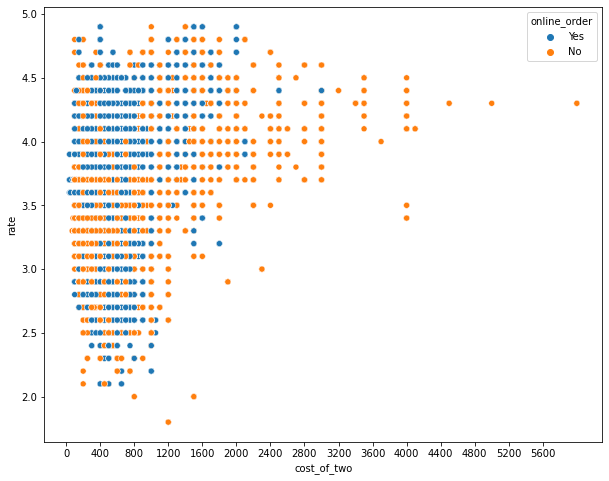

In [372]:
plt.figure(figsize=(10,8))
sns.scatterplot(y=df['rate'],x=df['cost_of_two'],hue=df['online_order'])
plt.xticks(range(0,6000,400));

In [ ]:
#most of the restaurants are offering between 200 to 1200 rs range and 
#we can se very less restaurants above 2500 rs(cost of two
#the restaurants which are offering at premium price >2500 are not supplying online
#for both online and ofline approx cost of two greater than 1500rs can be considered as premium restaurants
# there is no relation between rating and price charged by hotel


<AxesSubplot:xlabel='book_table', ylabel='cost_of_two'>

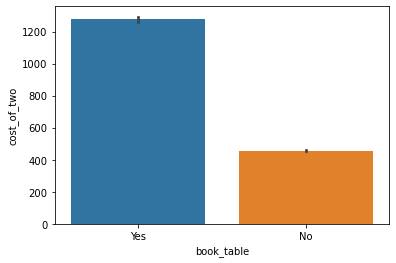

In [378]:
sns.barplot(x=df['book_table'],y=df['cost_of_two'])

In [ ]:
# the avg price of restaurant is more when they are providing booking table option compare to not providing booking 
#table option

In [ ]:
sns.barplot(df['rest_type'])

In [429]:
df['rest_type1']=df['rest_type'].map(lambda x: x.split(','))

In [431]:
df1=df.explode(column=['rest_type1'])

In [432]:
df1['rest_type1'].unique()

array(['Casual Dining', 'Cafe', ' Casual Dining', 'Quick Bites', ' Cafe',
       ' Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor', 'Bakery',
       ' Dessert Parlor', 'Pub', 'Takeaway', ' Delivery', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery',
       ' Beverage Shop', ' Sweet Shop', 'Kiosk', 'Food Truck', ' Bar',
       ' Bakery', 'Microbrewery', 'Lounge', 'Food Court', 'Dhaba', ' Pub',
       ' Microbrewery', ' Food Court', 'Club', ' Irani Cafee', ' Lounge',
       ' Kiosk', 'Bhojanalya', 'Pop Up', ' Mess', ' Meat Shop'],
      dtype=object)

In [ ]:
#same values is identified as unique beacuse of wrong entry

In [434]:
#using strip to make all entry same
df1['rest_type1']=df1['rest_type1'].map(lambda x: x.strip())

In [435]:
df1['rest_type1'].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', 'Dhaba',
       'Club', 'Irani Cafee', 'Bhojanalya', 'Pop Up', 'Meat Shop'],
      dtype=object)

In [444]:
plt.figure(figsize=(10,8))
df_rest=df1.groupby(by=['rest_type1'])['cost_of_two'].mean().sort_values().reset_index()

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='cost_of_two', ylabel='rest_type1'>

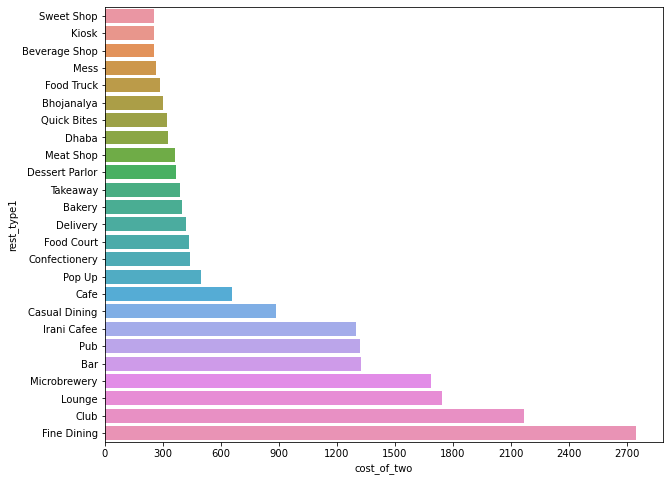

In [457]:
plt.figure(figsize=(10,8))
plt.xticks(range(0,3000,300))
sns.barplot(y=df_rest['rest_type1'],x=df_rest['cost_of_two'])

In [ ]:
# avg price of Fine dining restaurants is higest followed by club and lounge
#we can say the retaurants types are the premium types 
#pub and bar aslo have avg cost of two people more than 1300
#sweet shops bakery and food truck have min avg cost of two people around rs300

In [596]:
o=df.groupby(['listed_in(type)'])['cost_of_two'].mean().sort_values().index

<AxesSubplot:xlabel='listed_in(type)', ylabel='cost_of_two'>

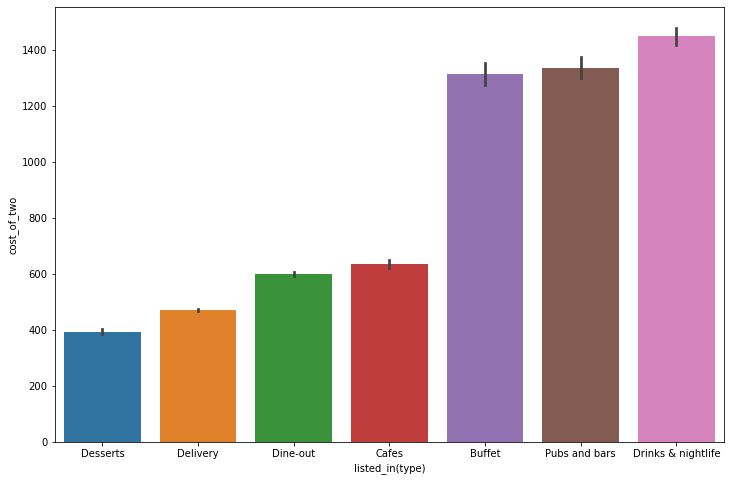

In [600]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['listed_in(type)'],y=df['cost_of_two'],order=o)

In [601]:
#Drinks and night life have higest avg cost followed by pubs and bars
#Desserts have least avg cost of two

In [581]:
o=list(df.groupby(by=['area'])['cost_of_two'].mean().sort_values().index)

<AxesSubplot:xlabel='cost_of_two', ylabel='area'>

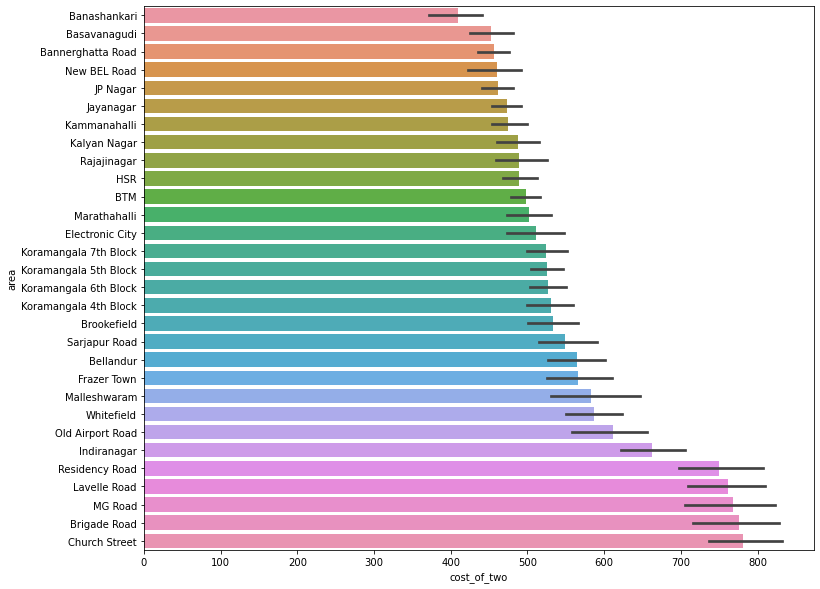

In [583]:
plt.figure(figsize=(12,10))
sns.barplot(y=df['area'],x=df['cost_of_two'],order=o)

In [584]:
#chruch street have expensive restaurants followed by brigade road and mg road at more than rs 700 for 2 peope
#Banashankri bsavanagudi and banergatta road has less avg price among all area @ around 400 rs for 2 people

Step 5: Make a copy of the data set and Perform the preprocessing that require for the
model.
Note: You can see many categorical variables with a high number of unique values.
Therefore do not keep dropping the variables as the fi

Feature enginering

In [585]:
#Handeling cuisines

In [459]:
df['cuisines'].value_counts().head(30)

North Indian                           2722
North Indian, Chinese                  2275
South Indian                           1736
Biryani                                 874
Bakery, Desserts                        870
Desserts                                739
Fast Food                               736
Cafe                                    715
South Indian, North Indian, Chinese     684
Bakery                                  594
Chinese                                 515
Ice Cream, Desserts                     411
Chinese, North Indian                   395
Mithai, Street Food                     357
North Indian, Chinese, Biryani          328
Desserts, Ice Cream                     322
South Indian, North Indian              300
North Indian, South Indian              293
North Indian, South Indian, Chinese     282
North Indian, Biryani                   274
Beverages                               273
Biryani, Kebab                          267
Finger Food                     

In [483]:
# tying to get uique values in cuisins
cu=[i for i in df.cuisines.str.split(',')]

In [484]:
cus=[]
for i in cu:
    for j in i:
        cus.append(j.lower().strip())

In [485]:
np.unique(cus)
#these are the unique cuisins offered since same restaurants is offerenig multiple cuisins we can reduce to some cusins
#we can include columns whether the cuisins are availbale or not at a particular restaurant

array(['afghan', 'afghani', 'african', 'american', 'andhra', 'arabian',
       'asian', 'assamese', 'australian', 'awadhi', 'bakery', 'bar food',
       'bbq', 'belgian', 'bengali', 'beverages', 'bihari', 'biryani',
       'bohri', 'british', 'bubble tea', 'burger', 'burmese', 'cafe',
       'cantonese', 'charcoal chicken', 'chettinad', 'chinese', 'coffee',
       'continental', 'desserts', 'drinks only', 'european', 'fast food',
       'finger food', 'french', 'german', 'goan', 'greek', 'grill',
       'gujarati', 'healthy food', 'hot dogs', 'hyderabadi', 'ice cream',
       'indonesian', 'iranian', 'italian', 'japanese', 'jewish', 'juices',
       'kashmiri', 'kebab', 'kerala', 'konkan', 'korean', 'lebanese',
       'lucknowi', 'maharashtrian', 'malaysian', 'malwani', 'mangalorean',
       'mediterranean', 'mexican', 'middle eastern', 'mithai',
       'modern indian', 'momos', 'mongolian', 'mughlai', 'naga',
       'nepalese', 'north eastern', 'north indian', 'oriya', 'paan',
       

In [486]:
cus=['Afghani','African','American','Andhra','Bakery','Bar','BBQ','Beverages','Biryani',
    'Burger','cafe','Chinese','coffee','continental','desserts','European','Fast food','french','gujarati','Hyderabadi',
     'Italian','Japanese','Kashmiri','Kerala','mexican','momos','North Indian','Pizza','Rajasthani','Rolls',
     'Sandwich','Seafood','South Indian','Steak','Street food','Wraps']

In [487]:
dic={}
for i in cus:
       dic.update({i:[df['cuisines'].str.contains(i,case=False).sum()]})

In [488]:
#removing the cusinis which are less tha 300
cusins=pd.DataFrame(dic).transpose()
for i in list(cusins[cusins[0]<300].index):
    cus.remove(i)

In [489]:
dic={}
for i in cus:
       dic.update({i:[df['cuisines'].str.contains(i,case=False).sum()]})

In [490]:
cusinis=pd.DataFrame(dic).transpose()
cusinis

,0
American,1455
Andhra,1678
Bakery,2716
BBQ,712
Beverages,4449
Biryani,6119
Burger,1950
cafe,5070
Chinese,14683
continental,5455


In [491]:
for i in cusinis.index:
    df[i]=np.where(df['cuisines'].str.contains(i,case=False),1,0)

In [359]:
df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost_of_two,listed_in(type),area,American,...,mexican,momos,North Indian,Pizza,Rolls,Sandwich,Seafood,South Indian,Steak,Street food
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,0,...,0,0,1,0,0,0,0,0,0,0
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,0,...,0,0,1,0,0,0,0,0,0,0
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,0,...,1,0,0,0,0,0,0,0,0,0
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0,...,0,0,1,0,0,0,0,1,0,0
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,0,...,0,0,1,0,0,0,0,0,0,0


Handeling rest_type

In [524]:
rest_type=df1['rest_type1'].value_counts().reset_index().iloc[0:22]['index'].values

In [525]:
rest_type

array(['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bar', 'Takeaway', 'Bakery', 'Beverage Shop',
       'Pub', 'Sweet Shop', 'Food Court', 'Lounge', 'Fine Dining',
       'Microbrewery', 'Mess', 'Kiosk', 'Food Truck', 'Confectionery',
       'Club', 'Dhaba', 'Irani Cafee'], dtype=object)

In [535]:
df.reset_index(drop=True,inplace=True)

In [536]:
for i in rest_type:
    df[i]=np.where(df['rest_type'].str.contains(i),1,0)

In [539]:
pd.set_option("display.max_columns",None)
df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost_of_two,listed_in(type),area,rest_type1,American,Andhra,Bakery,BBQ,Beverages,Biryani,Burger,cafe,Chinese,continental,desserts,European,Fast food,Hyderabadi,Italian,Japanese,Kerala,mexican,momos,North Indian,Pizza,Rolls,Sandwich,Seafood,South Indian,Steak,Street food,Quick Bites,Casual Dining,Cafe,Delivery,Dessert Parlor,Bar,Takeaway,Beverage Shop,Pub,Sweet Shop,Food Court,Lounge,Fine Dining,Microbrewery,Mess,Kiosk,Food Truck,Confectionery,Club,Dhaba,Irani Cafee
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,[Casual Dining],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,[Casual Dining],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,"[Cafe, Casual Dining]",0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,[Quick Bites],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,[Casual Dining],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [543]:
# now we can drop rest_type,cuisines since it is encoded as well as treated
df.drop(['rest_type',"rest_type1",'cuisines'],axis=1,inplace=True)

In [544]:
df.head()

,online_order,book_table,rate,votes,cost_of_two,listed_in(type),area,American,Andhra,Bakery,BBQ,Beverages,Biryani,Burger,cafe,Chinese,continental,desserts,European,Fast food,Hyderabadi,Italian,Japanese,Kerala,mexican,momos,North Indian,Pizza,Rolls,Sandwich,Seafood,South Indian,Steak,Street food,Quick Bites,Casual Dining,Cafe,Delivery,Dessert Parlor,Bar,Takeaway,Beverage Shop,Pub,Sweet Shop,Food Court,Lounge,Fine Dining,Microbrewery,Mess,Kiosk,Food Truck,Confectionery,Club,Dhaba,Irani Cafee
0,Yes,Yes,4.1,775,800.0,Buffet,Banashankari,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Yes,No,4.1,787,800.0,Buffet,Banashankari,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Yes,No,3.8,918,800.0,Buffet,Banashankari,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No,No,3.7,88,300.0,Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,No,No,3.8,166,600.0,Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Step 6: Perform statistical hypothesis testing on features to get an idea of whether features
are impacting the target variables.

<AxesSubplot:>

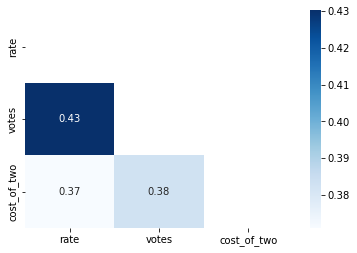

In [608]:
sns.heatmap(df[['rate',"votes",'cost_of_two']].corr(),annot=True,cmap='Blues',mask=np.triu(df[['rate',"votes",'cost_of_two']].corr()))

In [609]:
from scipy import stats

In [614]:
print('Pvalue of','rate',stats.spearmanr(df['rate'],df['cost_of_two'])[1])
print('Pvalue of','votes',stats.spearmanr(df['votes'],df['cost_of_two'])[1])

Pvalue of rate 0.0
Pvalue of votes 0.0


In [615]:
#both numerical columns are correlated

In [616]:
#performing stats test fro categorical variables

In [632]:
#two sample t test for cat =2 categories
for i in df[['online_order','book_table']].columns:
    p_value=stats.ttest_ind(df[df[i]=='No']['cost_of_two'],df[df[i]=='Yes']['cost_of_two'])[1]
    print('P value of {} vs cost of two people is {}'.format(i,round(p_value,2)))

P value of online_order vs cost of two people is 0.0
P value of book_table vs cost of two people is 0.0


In [ ]:
#both online_order and book table are influencing target variable

In [ ]:
#performing annowa test for cat greater than 2

In [633]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [634]:
buffet=df[df['listed_in(type)']=='Buffet']['cost_of_two']
cafe=df[df['listed_in(type)']=='Cafes']['cost_of_two']
Delivery=df[df['listed_in(type)']=='Delivery']['cost_of_two']
Desserts=df[df['listed_in(type)']=='Desserts']['cost_of_two']
dine=df[df['listed_in(type)']=='Dine-out']['cost_of_two']
nigh=df[df['listed_in(type)']=='Drinks & nightlife']['cost_of_two']
pub=df[df['listed_in(type)']=='Pubs and bars']['cost_of_two']

In [635]:
stats.f_oneway(buffet,cafe,Delivery,Desserts,dine,nigh,pub)

F_onewayResult(statistic=2199.91282546182, pvalue=0.0)

In [636]:
#since p value is less than 5% the column listed in effects target variable approx cost of two

Step 7: Split the dataset into train and test data sets and Perform the scaling on both sets if
necessary.

In [ ]:
#encoding

In [639]:
df['online_order']=df['online_order'].replace({'Yes':1,'No':0})
df['book_table']=df['book_table'].replace({'Yes':1,'No':0})

In [640]:
# dummie encoding 

,online_order,book_table,rate,votes,cost_of_two,listed_in(type),area,American,Andhra,Bakery,BBQ,Beverages,Biryani,Burger,cafe,Chinese,continental,desserts,European,Fast food,Hyderabadi,Italian,Japanese,Kerala,mexican,momos,North Indian,Pizza,Rolls,Sandwich,Seafood,South Indian,Steak,Street food,Quick Bites,Casual Dining,Cafe,Delivery,Dessert Parlor,Bar,Takeaway,Beverage Shop,Pub,Sweet Shop,Food Court,Lounge,Fine Dining,Microbrewery,Mess,Kiosk,Food Truck,Confectionery,Club,Dhaba,Irani Cafee
0,1,1,4.1,775,800.0,Buffet,Banashankari,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,Buffet,Banashankari,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,Buffet,Banashankari,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [642]:
df=pd.get_dummies(df,drop_first=True)

In [644]:
X=df.drop(['cost_of_two'],axis=1)
y=df['cost_of_two']

In [681]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

Step 8: Build the base model

In [690]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [691]:
y_train_predict=lr.predict(X_train)
y_test_predict=lr.predict(X_test)

In [694]:
from sklearn.metrics import mean_squared_error, r2_score
print('Train r2',r2_score(y_train,y_train_predict))
print('Test r2',r2_score(y_test,y_test_predict))

Train r2 0.7568335725960509
Test r2 0.7707551923565618


In [697]:
print('Train error',mean_squared_error(y_train,y_train_predict,squared=False))
print('Test error',mean_squared_error(y_test,y_test_predict,squared=False))

Train error 217.7031007770826
Test error 215.26181582842145


In [ ]:
# r2  for train and test from liner regressor is around .78
#we can build Random forest regressor to imporve performance

In [698]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=100)
RF.fit(X_train,y_train)

RandomForestRegressor()

In [699]:
y_train_predict=RF.predict(X_train)
y_test_predict=RF.predict(X_test)

In [684]:
from sklearn.metrics import mean_squared_error, r2_score

In [704]:
print('Train r2',r2_score(y_train,y_train_predict))
print('Test r2',r2_score(y_test,y_test_predict))

Train r2 0.9904887629968895
Test r2 0.9561905614621369


In [705]:
print('Train error',mean_squared_error(y_train,y_train_predict,squared=False))
print('Test error',mean_squared_error(y_test,y_test_predict,squared=False))

Train error 43.05576495127347
Test error 94.10248435666708


In [706]:
#so after building Random forest model we were able to achieve 0.99 r2 in train and 0.95 in test 
#the error is also reduced considerabaly
#so no need to do grid search or hyper parameter tuning since r2 is alomost 1 and model is predicting perfectly

Section B:

Objective:
The Aim is to classify the orders that have been ordered online and offline. And
identify the patterns that lead to orders online orders as well as offline. Your model should
be able to classify the classes effectively.

In [708]:
#since the future engineering and encoding are all done in previous steps we can start building
#different model for the business problem

In [724]:
df['online_order'].value_counts(normalize=True)
#data is not immbalanced

1    0.597631
0    0.402369
Name: online_order, dtype: float64

In [766]:
df.reset_index(drop=True,inplace=True)

In [783]:
X=df.drop(['online_order'],axis=1)
y=df['online_order']

In [802]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [785]:
#base model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [716]:
from sklearn.metrics import classification_report

In [786]:
y_train_predict=lr.predict(X_train)
y_test_predict=lr.predict(X_test)

In [787]:
print('train report\n',classification_report(y_train,y_train_predict))
print('test report\n',classification_report(y_test,y_test_predict))

train report
               precision    recall  f1-score   support

           0       0.64      0.50      0.56     13148
           1       0.71      0.81      0.75     19600

    accuracy                           0.68     32748
   macro avg       0.67      0.65      0.66     32748
weighted avg       0.68      0.68      0.67     32748

test report
               precision    recall  f1-score   support

           0       0.63      0.49      0.55      6519
           1       0.70      0.80      0.75      9611

    accuracy                           0.68     16130
   macro avg       0.66      0.65      0.65     16130
weighted avg       0.67      0.68      0.67     16130



In [727]:
#accuarcy is almost same in train and test which is 0.69
#we can build different model to improve performance

In [788]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [789]:
y_train_predict=dc.predict(X_train)
y_test_predict=dc.predict(X_test)

In [790]:
print('train report\n',classification_report(y_train,y_train_predict))
print('test report\n',classification_report(y_test,y_test_predict))

train report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     13148
           1       1.00      0.99      1.00     19600

    accuracy                           0.99     32748
   macro avg       0.99      1.00      0.99     32748
weighted avg       0.99      0.99      0.99     32748

test report
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      6519
           1       0.86      0.85      0.86      9611

    accuracy                           0.83     16130
   macro avg       0.82      0.83      0.83     16130
weighted avg       0.83      0.83      0.83     16130



In [740]:
#train accuracy is .99 and test accuracy is 0.83 the model is overfitting

In [791]:
#we can try grid search cv

In [814]:
tuned = [{'criterion':['entropy','gini'],'max_depth':range(2,15),'min_samples_split':range(1,9)}]
from sklearn.model_selection import GridSearchCV
decision = DecisionTreeClassifier()
grid_model = GridSearchCV(estimator = decision, param_grid=tuned,cv=5)
grid_model.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
130 fits failed out of a total of 1040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 15),
                          'min_samples_split': range(1, 9)}])

In [815]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 5}

In [816]:
#now building model with best params
dc=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_split=5)
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_split=5)

In [817]:
y_train_predict=dc.predict(X_train)
y_test_predict=dc.predict(X_test)
print('train report\n',classification_report(y_train,y_train_predict))
print('test report\n',classification_report(y_test,y_test_predict))

train report
               precision    recall  f1-score   support

           0       0.81      0.75      0.78     13223
           1       0.84      0.88      0.86     19525

    accuracy                           0.83     32748
   macro avg       0.83      0.82      0.82     32748
weighted avg       0.83      0.83      0.83     32748

test report
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      6444
           1       0.81      0.85      0.83      9686

    accuracy                           0.79     16130
   macro avg       0.78      0.77      0.77     16130
weighted avg       0.78      0.79      0.78     16130



In [ ]:
#after performing grid search we can see accuracy reduced in both train and test

In [818]:
#so we can build Random forest Classifier to see weather performnce increases

In [819]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=150)
rc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [820]:
y_train_predict=rc.predict(X_train)
y_test_predict=rc.predict(X_test)
print('train report\n',classification_report(y_train,y_train_predict))
print('test report\n',classification_report(y_test,y_test_predict))

train report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     13223
           1       1.00      0.99      1.00     19525

    accuracy                           0.99     32748
   macro avg       0.99      0.99      0.99     32748
weighted avg       0.99      0.99      0.99     32748

test report
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      6444
           1       0.86      0.91      0.88      9686

    accuracy                           0.86     16130
   macro avg       0.86      0.85      0.85     16130
weighted avg       0.86      0.86      0.86     16130



In [ ]:
#so now we can see the performance is increased and accuracy in test also increased to 0.86  which is good 
#compared to previous  models

In [827]:
from sklearn.metrics import roc_curve,roc_auc_score

In [845]:
def plot_roc(model, test_data):
    
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for loan default Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

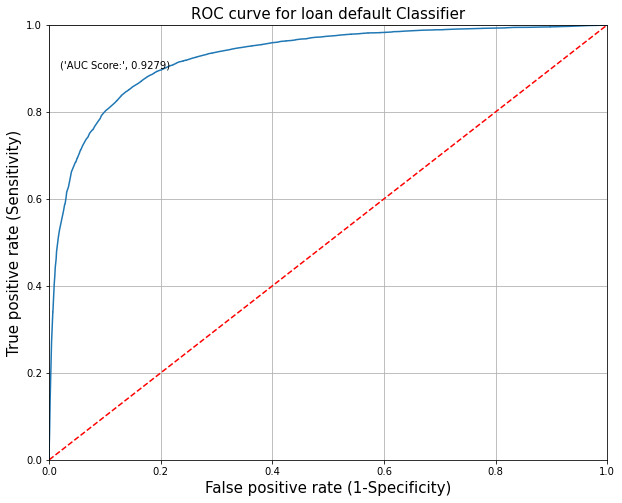

In [846]:
plt.figure(figsize=(10,8))
plot_roc(rc,X_test)